In [1]:
import scipy.linalg as la
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
from helper_functions.grape_functions import *
from main_grape.Grape_original import Grape
from helper_functions.qutip_open_verification import *

%pylab inline

print parentdir
from IPython import display


ImportError: Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/pywrap_tensorflow.py", line 41, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
ImportError: libcusolver.so.8.0: cannot open shared object file: No such file or directory


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [2]:
#Defining time scales
total_time = 10.0
steps = 400

state_transfer = True
#Defining H0
qubit_state_num = 3

Q_x   = np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)+np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1)
Q_y = (0+1j) *(np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)- np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1))
Q_z   = np.diag(np.arange(0,qubit_state_num))
I_q = np.identity(qubit_state_num)
H_q = np.diag([0,2*np.pi*5.0,2*np.pi*1.8])
H0 = H_q 
       

#Defining Forbidden sates


#Defining Concerned states (starting states)
psi0=[0]

#Defining states to include in the drawing of occupation
states_draw_list = [0,1,2]
states_draw_names = ['0','2','1']

#Defining U (Target)
if state_transfer:
    U =[]
    U1 = np.zeros(qubit_state_num,dtype=complex)
    U1[2]=1
    U1[0]=0
    U.append(U1)
    U2 = np.zeros(qubit_state_num,dtype=complex)
    U2[0]=1
    #U.append(U2)
    
else:
    Ut_c = la.expm((0-1j)*total_time*H0)
    Ct_c = Ut_c.copy()
    Ct_c[1,0] = 1
    Ct_c[0,1] = 1
    Ct_c[0,0] = 0
    Ct_c[1,1] = 0
    U = Ct_c

print np.shape(U)
#Defining U0 (Initial)
q_identity = np.identity(qubit_state_num)
U0= q_identity

#Defining control Hs
XI = Q_x
ZI = Q_z

k0 = np.matrix([1,0,0])
k1 = np.matrix([0,0,1])
k2 = np.matrix([0,1,0])
H02 = np.dot(np.transpose(k0),k2) + np.dot(np.transpose(k2),k0)
H12 = np.dot(np.transpose(k1),k2) + np.dot(np.transpose(k2),k1)

Hops = [H02+H12]
ops_max_amp = [3.0]
Hnames =['d']

#Defining convergence parameters
max_iterations = 50000
decay = max_iterations/2
convergence = {'rate':0, 'update_step':10, 'max_iterations':max_iterations,\
               'conv_target':2.5e-8,'learning_rate_decay':decay}
reg_coeffs = {'envelope' :0.05,  'dwdt':0.001,'d2wdt2':0.001*0.0001}
#reg_coeffs = { 'speed_up':100}
reg_coeffs = {'envelope' : 0,  'dwdt':0,'d2wdt2':0}
#multi_mode = {'dressed':dressed, 'vectors':v_c, 'qnum':qubit_state_num, 'mnum': mode_state_num,\
              #'f':freq_ge, 'es':w_c, 'g1':qm_g1, 'D':D, 'Interpolation':True, 'Modulation':True}

    #Defining initial pulses

print len(U)
print np.shape(Hops)

print np.dot(np.dot(np.transpose(k0),k2),np.transpose(k2))

(1, 3)
1
(1, 3, 3)
[[1]
 [0]
 [0]]


In [3]:
T1_02 = 20.0
T1_12 = 20.0



T1_02 = 20.0
T1_12 = 20.0


a_02 = np.dot(np.transpose(k0),k2)
a_12 = np.dot(np.transpose(k1),k2)
c_ops=[]
c_ops.append(a_02*np.sqrt(1/T1_02))
c_ops.append(a_12*np.sqrt(1/T1_12))

#c_ops.append(ef)

print c_ops
print np.shape(c_ops)

[matrix([[ 0.       ,  0.2236068,  0.       ],
        [ 0.       ,  0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       ]]), matrix([[ 0.       ,  0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       ],
        [ 0.       ,  0.2236068,  0.       ]])]
(2, 3, 3)


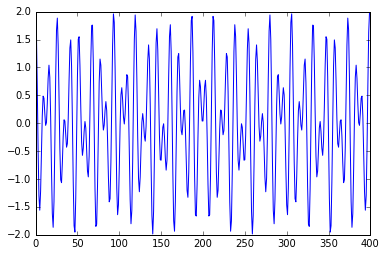

In [4]:
import h5py

with h5py.File('/home/mohamed/Data/01136_Qubit_Pi_open.h5','r') as hf:
    error = np.array(hf.get('error'))
    idx = list(error).index(np.min(error))
        
       
    u0 = np.array(hf.get('uks'))[idx]

u0 = None

o0 = 1
o1 = 1

d0 = 0.3
d1 = 0.2


signal = o0*np.cos(2*np.pi*(5.0-d0)*np.linspace(0,total_time, steps)) + o1*np.cos(2*np.pi*(3.2-d1)*np.linspace(0,total_time, steps))
#u0 = []
#u0.append(np.ones(steps))
#u0.append(2*np.ones(steps))
plot(signal)
u0 = []
u0.append(signal)
#u0 = None

In [5]:
import h5py

with h5py.File('/home/mohamed/Data/00099_Lambda.h5','r') as hf:
    error = np.array(hf.get('error'))
    idx = list(error).index(np.min(error))
        
       
    #u0 = np.array(hf.get('uks'))[idx]

#u0 = None


TypeError: 'NoneType' object is not iterable

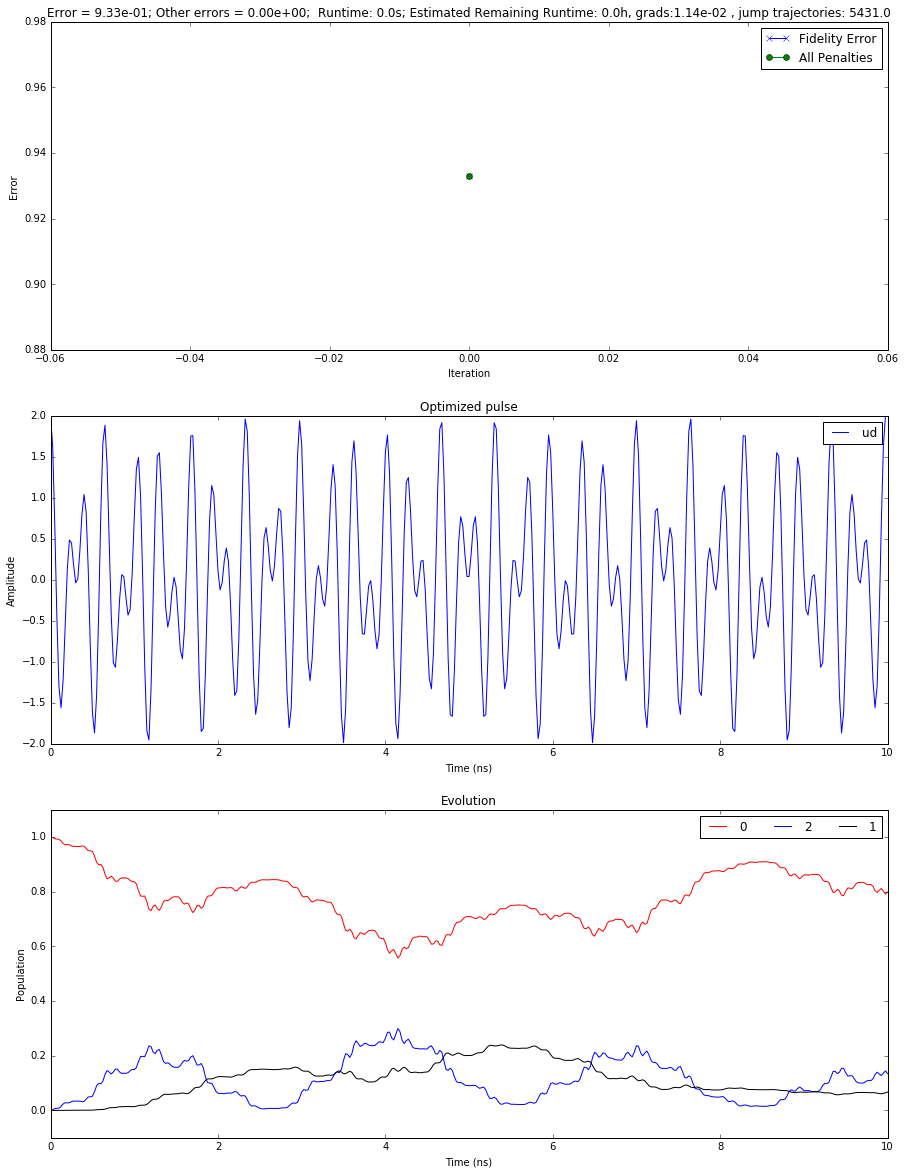

In [6]:
 #Extra options
#reg_coeffs = reg_coeffs,draw = [states_draw_list,states_draw_names] ,forbidden = states_forbidden_list,multi_mode = multi_mode,
#maxA = ops_max_amp,use_gpu = True

      
uks,U_final = Grape(H0,Hops,Hnames,U,total_time,steps,psi0,convergence=convergence, draw = [states_draw_list,states_draw_names],  
                    
                    show_plots = True, c_ops = c_ops, initial_guess = u0, use_gpu = False,
       unitary_error = 1e-4,  maxA=ops_max_amp, state_transfer = state_transfer, method ='Adam',
                    reg_coeffs=reg_coeffs, file_name='Lambda', trajectories = 50000, do_all_traj = False,
                    data_path = '/home/mohamed/Data')

In [ ]:
#1053 9% 1054 no c 1055 13.3%
#1060 no c 
#1079 no c 1082 3.3% 100ns 

In [ ]:
open_qutip_verification('/home/mohamed/Data/00100_Lambda.h5')



In [ ]:
open_qutip_verification('/home/mohamed/Data/01060_Qubit_Pi_open.h5')
open_qutip_verification('/home/mohamed/Data/01061_Qubit_Pi_open.h5')
open_qutip_verification('/home/mohamed/Data/01062_Qubit_Pi_open.h5')


In [ ]:
open_qutip_verification('/home/mohamed/Data/01079_Qubit_Pi_open.h5')
open_qutip_verification('/home/mohamed/Data/01082_Qubit_Pi_open.h5')
open_qutip_verification('/home/mohamed/Data/01084_Qubit_Pi_open.h5')

open_qutip_verification('/home/mohamed/Data/01085_Qubit_Pi_open.h5')
